In [1]:
import argparse
import os
import sys
import numpy as np
import time
import torch
import pandas as pd

orig_stim_path = '/user_data/mmhender/stimuli/featsynth/images_comb64_orig'
save_stim_path = '/user_data/mmhender/stimuli/featsynth/images_comb64'

ecoset_info_path = '/user_data/mmhender/stimuli/ecoset_info/'

# import synthesize_textures

In [2]:
torch.__version__


'2.0.1+cu117'

In [4]:
np.array([103.53, 116.28, 123.675]) / 255

array([0.406, 0.456, 0.485])

In [2]:
import os
import sys
import numpy as np
import torch
import pandas as pd
import PIL
import time

# this is where the saved model files is located
texture_synth_root = os.path.dirname(os.getcwd())

sys.path.append('/user_data/mmhender/featsynth/texture_synthesis/code/')
import utilities
import model_spatial
import optimize

import model_spatial_combineimages
import optimize_combineimages

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
st_overall = time.time()

# if args.debug:
#     print('\nDEBUG MODE\n')
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# The full list of images to use is already made.
# Made this in choose_extra_ecoset_ims.py and prep_images_comb64.py
image_list_filename = os.path.join(orig_stim_path, 'images_comb64_list.csv')
print(image_list_filename)
image_list = pd.read_csv(image_list_filename, index_col=0)

# save_stim_path = '/user_data/mmhender/stimuli/featsynth/images_comb64'
# print(save_stim_path)
# if args.all_layers:
#     save_stim_path = save_stim_path + '_alllayers'
# else:
#     save_stim_path = save_stim_path + '_selectlayers'

# save_stim_path = save_stim_path + '_%dsteps'%args.n_steps

n_images = image_list.shape[0]

# info about ecoset categories
fn = os.path.join(ecoset_info_path, 'categ_use_ecoset.npy')
info = np.load(fn, allow_pickle=True).item()
bnames = list(info['binfo'].keys())


ims_process = np.arange(1)
# im_seed = 867878

batches = [np.arange(0, 16), np.arange(16, 32), np.arange(32, 48), np.arange(48, 64)]


cuda
/user_data/mmhender/stimuli/featsynth/images_comb64_orig/images_comb64_list.csv


In [4]:
bi = 0
bname = bnames[bi]
labs = image_list.iloc[np.array(image_list['basic_name']==bname)]
      

ii = 2;

keys = ['seed%d'%s for s in [0,1,2,3]]
seed_list = [np.array(labs[k])[ii] for k in keys]

print(seed_list)
# im_seed+=4

# if ii>10:
#     continue

target_image_filename = np.array(labs['image_filename_new'])[ii]

print('\nCATEG %d of %d, IMAGE %d\n'%(bi, len(bnames), ii))
print('processing target image %s'%target_image_filename)
sys.stdout.flush()

[495813, 260649, 529785, 291657]

CATEG 0 of 64, IMAGE 2

processing target image /user_data/mmhender/stimuli/featsynth/images_comb64_orig/beetle/beetle_03s.png


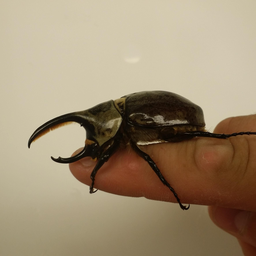

In [5]:
PIL.Image.open(target_image_filename)

In [6]:
layers_do = ['pool1','pool2','pool3','pool4']


n_steps = 100;
rndseed = seed_list;
all_layers = False;
save_loss = False;

print(rndseed)

model_path = os.path.join(texture_synth_root, 'models','VGG19_normalized_avg_pool_pytorch')

class a:
    def __init__():
        return a
    
args = a
args.lr = 1.0
args.max_iter = 20
args.checkpoint_every = 1

args.jitter_pix = 5;
args.do_sqrt = True
# args.rndseed = rndseed




# st = time.time()
# target_image_tosave = utilities.preprocess_image_tosave(
#     utilities.load_image(target_image_filename)
# )
# filename_save = os.path.join(out_dir, 'orig.png')
# print('saving image to %s'%filename_save)
# target_image_tosave.save(filename_save)
# elapsed = time.time() - st
# print('took %.5f s to preproc and save orig image'%elapsed)

st = time.time()
# load target image to use in synthesis (different preproc than above)
target_image = utilities.preprocess_image(
    utilities.load_image(target_image_filename)
)
elapsed = time.time() - st
print('took %.5f s to preproc image for synthesis'%elapsed)

layers_all = ['relu1_1', 'pool1','pool2','pool3','pool4']
        

[495813, 260649, 529785, 291657]
took 0.00670 s to preproc image for synthesis


In [7]:
args.n_steps = 100;

ll = 0;

curr_layer = layers_do[ll]

# current layer has to match one of the names in layers_all
index = np.where(curr_layer==np.array(layers_all))[0][0]
print(ll, index)

# which layers to match now? grab all layers up to and including this one.
layers_match = layers_all[0:index+1]

print('making texture for layers:')
print(layers_match)
sys.stdout.flush()

st = time.time()
net = model_spatial.Model(model_path, device, target_image, \
                          important_layers = layers_match, \
                          spatial_weights_list = None, 
                          layer_weights = [1e09 for l in layers_match], \
                          do_sqrt = args.do_sqrt)


0 1
making texture for layers:
['relu1_1', 'pool1']
matching layers:
['relu1_1', 'pool1']


In [8]:
import optimize_TEST

In [9]:
args.rndseed = rndseed[ll]

optimizer = optimize_TEST.Optimizer(net, args)
result = optimizer.optimize()
elapsed = time.time() - st

seed is: 495813
step: 1, loss: 72239296.0 (0.26s)
step: 2, loss: 71254496.0 (0.06s)
step: 3, loss: 45453128.0 (0.19s)
step: 4, loss: 16329523.0 (0.26s)
step: 5, loss: 9104397.0 (0.15s)
step: 6, loss: 7561217.0 (0.15s)
step: 7, loss: 6278076.0 (0.12s)
step: 8, loss: 5531837.0 (0.17s)
step: 9, loss: 6065725.0 (0.06s)
step: 10, loss: 5063335.0 (0.16s)
step: 11, loss: 5537420.5 (0.04s)
step: 12, loss: 5413710.5 (0.12s)
step: 13, loss: 4321547.0 (0.13s)
step: 14, loss: 4545132.0 (0.14s)
step: 15, loss: 5595920.0 (0.05s)
step: 16, loss: 4486779.5 (0.08s)
step: 17, loss: 3886952.25 (0.07s)
step: 18, loss: 3631092.5 (0.04s)
step: 19, loss: 3235289.0 (0.15s)
step: 20, loss: 5312147.0 (0.08s)
step: 21, loss: 3549557.0 (0.05s)
step: 22, loss: 4825113.5 (0.14s)
step: 23, loss: 3840773.5 (0.10s)
step: 24, loss: 3305847.75 (0.14s)
step: 25, loss: 3602237.5 (0.10s)
step: 26, loss: 3222457.0 (0.06s)
step: 27, loss: 3762259.5 (0.12s)
step: 28, loss: 3377038.0 (0.11s)
step: 29, loss: 3994142.75 (0.18s)


(-0.5, 255.5, 255.5, -0.5)

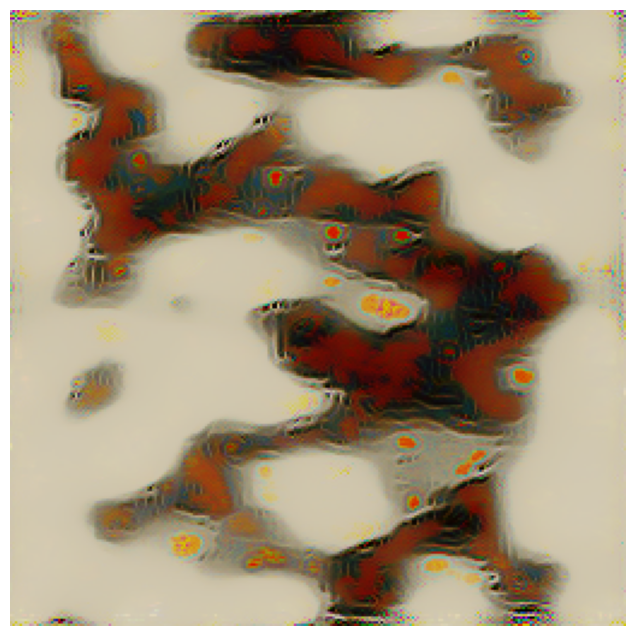

In [10]:
result = optimizer.opt_image.detach().cpu();
final_image = utilities.postprocess_image(
            result, utilities.load_image(target_image_filename)
        )
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.imshow(final_image)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

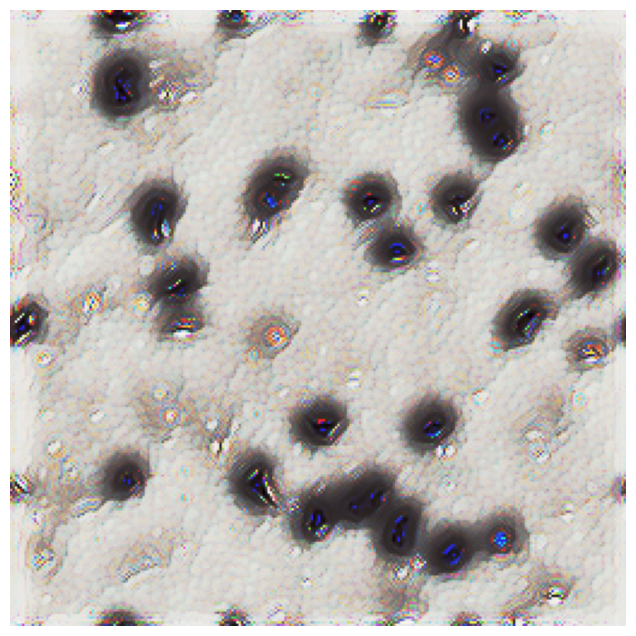

In [12]:
imfn = '/user_data/mmhender/stimuli/featsynth/images_comb64_jitter3pix/DEBUG/beetle/ex00/scramble_upto_pool1.png'
im = PIL.Image.open(imfn)
plt.figure(figsize=(8,8))
plt.imshow(im)
plt.axis('off')

In [21]:
args.rndseed = rndseed[ll]

optimizer = Optimizer(net, args)
result = optimizer.optimize()
elapsed = time.time() - st

seed is: 495813
-4 -4
-1 3
0 4
-3 1
-4 2
4 0
-5 0
-4 1
4 3
2 -2
-3 2
-5 -3
3 3
-2 2
2 -3
-4 3
-2 -3
2 -4
-5 4
-2 -2
4 -5
1 -1
-2 -5
-1 2
-3 -5
step: 1, loss: 69788264.0 (0.19s)
-1 -5
4 -2
2 -2
-5 -4
-2 -3
-2 -3
-2 -5
4 3
3 0
3 -1
0 -3
2 -3
2 2
4 -2
-3 1
-4 -3
-5 -4
-5 -1
3 3
-5 3
-3 3
step: 2, loss: 43696856.0 (0.21s)
-5 3
2 0
3 2
-3 -2
-4 3
-4 3
-2 -3
3 -1
3 -2
2 -4
0 -3
3 -5
-2 -1
0 -5
4 -2
4 -2
-2 4
-1 -3
-1 -4
-3 3
-1 3
0 -4
step: 3, loss: 8662277.0 (0.27s)
-1 -1
-4 2
2 0
-1 -1
-3 -3
-4 0
-1 -1
1 -2
2 -3
0 0
3 3
4 2
2 0
4 -3
step: 4, loss: 5981400.0 (0.11s)
-2 1
-3 -3
4 4
4 -4
0 3
0 3
0 -3
2 0
-3 2
step: 5, loss: 5597335.5 (0.06s)
-1 3
1 0
-2 3
-5 -3
4 0
4 -1
-3 -2
-4 1
-5 -5
2 1
-1 -3
0 1
3 2
2 1
1 3
3 -3
-4 2
-3 -1
0 2
4 -4
0 1
-3 0
2 -1
-5 4
-3 -3
-2 4
step: 6, loss: 4732682.0 (0.18s)
0 3
1 -2
3 4
4 1
3 -4
-1 4
-2 0
0 -3
step: 7, loss: 4088458.5 (0.06s)
-2 -5
-4 0
4 -2
-5 -5
4 -4
-5 -3
-1 3
2 -2
1 0
3 -1
-5 -2
-1 4
-2 -2
1 1
0 -3
-4 0
1 1
4 1
4 -4
-4 4
0 -5
1 -2
step: 8, loss: 3

In [24]:
# result

(-0.5, 255.5, 255.5, -0.5)

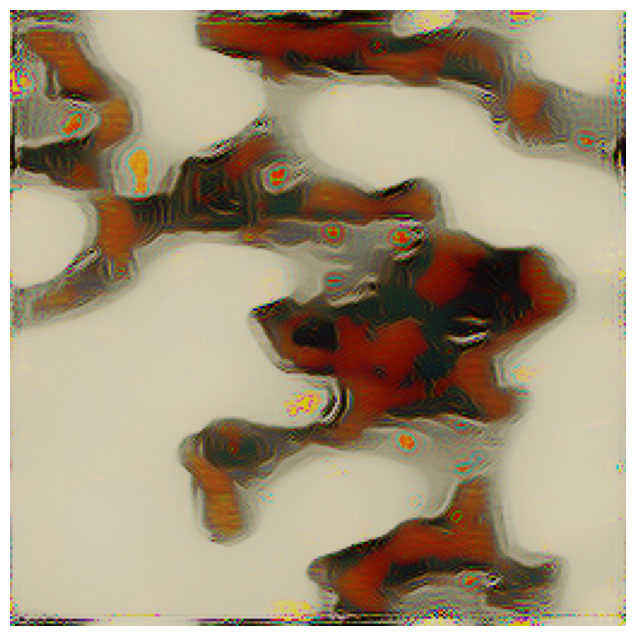

In [25]:
result = optimizer.opt_image.detach().cpu();
final_image = utilities.postprocess_image(
            result, utilities.load_image(target_image_filename)
        )
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.imshow(final_image)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

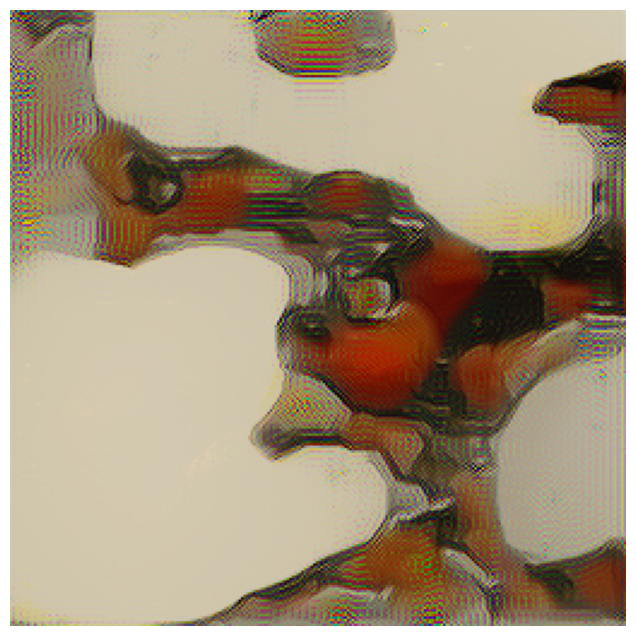

In [26]:
imfn = '/user_data/mmhender/stimuli/featsynth/images_comb64/beetle/ex02/scramble_upto_pool1.png'
im = PIL.Image.open(imfn)

plt.figure(figsize=(8,8))
plt.imshow(im)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

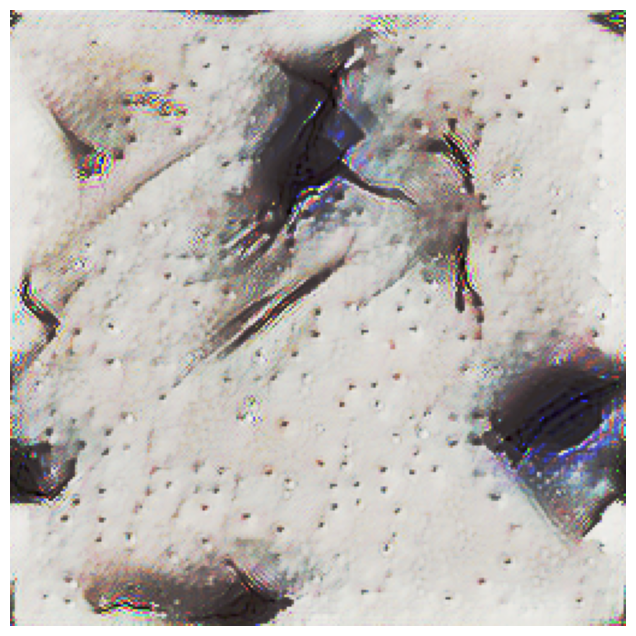

In [120]:
# result = optimizer.opt_image.detach().cpu();
final_image = utilities.postprocess_image(
            result, utilities.load_image(target_image_filename)
        )
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.imshow(final_image)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

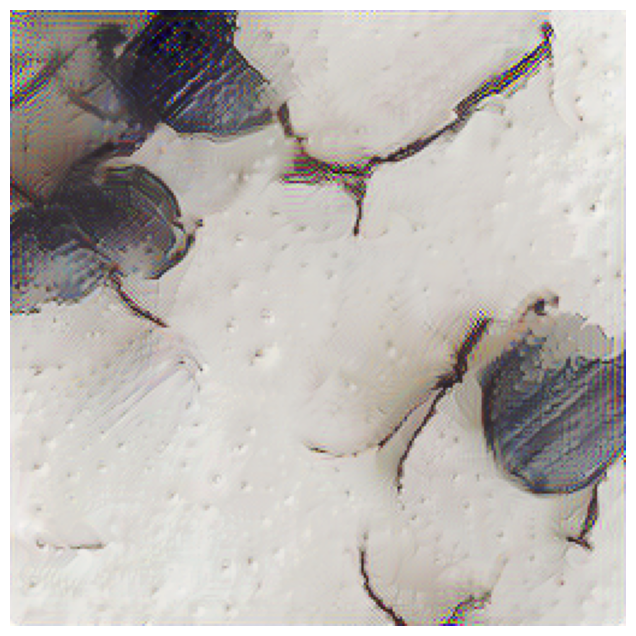

In [121]:
imfn = '/user_data/mmhender/stimuli/featsynth/images_comb64/beetle/ex00/scramble_upto_pool4.png'
im = PIL.Image.open(imfn)

plt.figure(figsize=(8,8))
plt.imshow(im)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

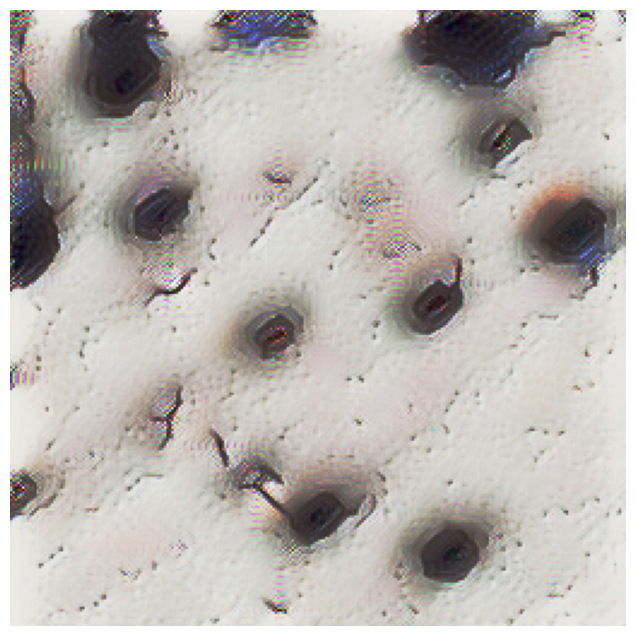

In [111]:
imfn = '/user_data/mmhender/stimuli/featsynth/images_comb64/beetle/ex00/scramble_upto_pool1.png'
im = PIL.Image.open(imfn)

plt.figure(figsize=(8,8))
plt.imshow(im)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

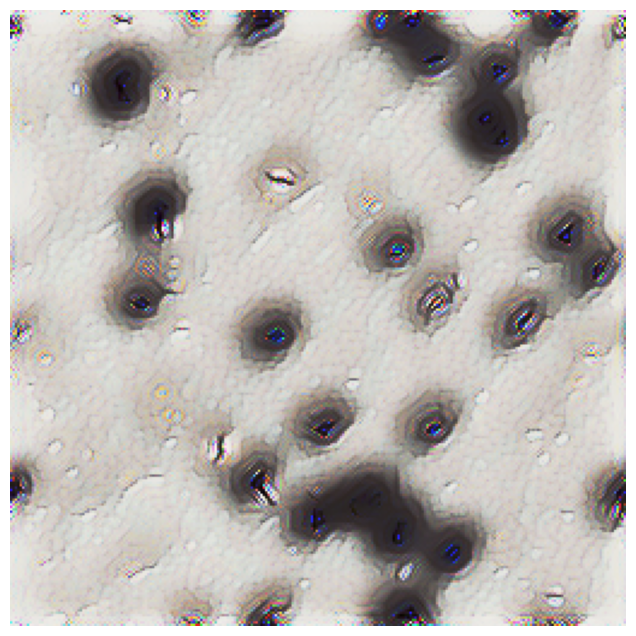

In [106]:
# result = optimizer.opt_image.detach().cpu();
final_image = utilities.postprocess_image(
            result, utilities.load_image(target_image_filename)
        )
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.imshow(final_image)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

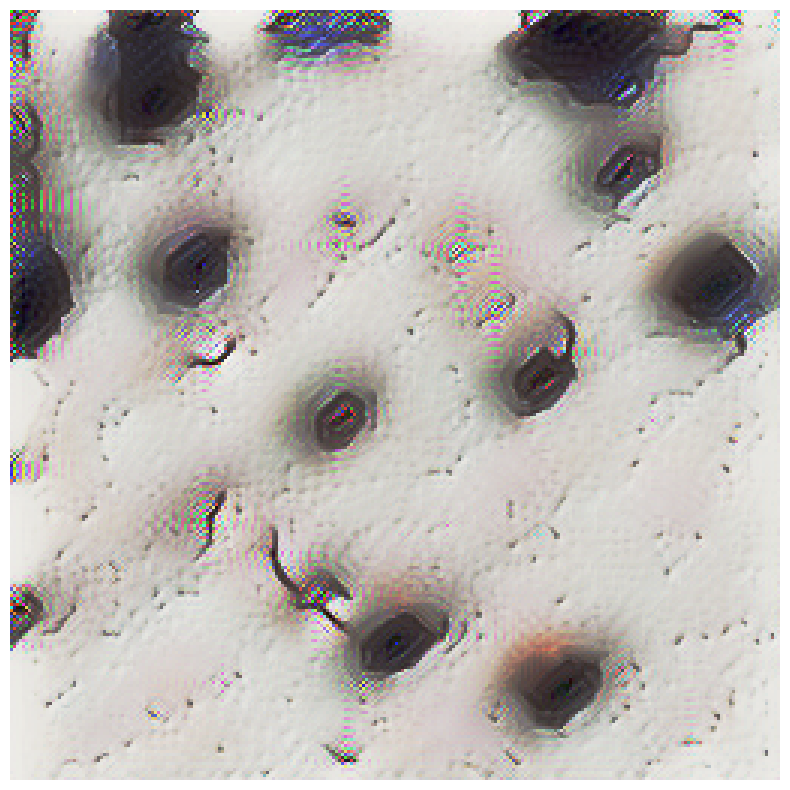

In [91]:
final_image = utilities.postprocess_image(
            result, utilities.load_image(target_image_filename)
        )
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(final_image)
plt.axis('off')

In [22]:
args.rndseed[ll]

258327